# Insights
It is important to understand how each component in the solver behaves to properly set up the configuration space and identify weak parts of the solver that should not be used. This notebook serves this purpose.

In [9]:
from CVRPSolver import solve, generate_initial_solution, DEFAULT_CONFIG
from CVRPSolver.TSP.TSP import reoptimize_routes
from random import randint, seed
from math import dist
import matplotlib.pyplot as plt
import time

SEED = 0
seed(SEED)

In [10]:
def plot(canvas, locations, a, b):
    def plot_routes(ax, routes, title):
        def plot_route(route):
            x = [locations[loc][0] for loc in route]
            y = [locations[loc][1] for loc in route]
            ax.plot(x, y, marker='o', linestyle='-', color='b')

        for route in routes:
            plot_route(route)

        ax.set_xticks([])
        ax.set_yticks([])
        depot = locations[0]
        ax.scatter(*depot, color='r', s=100, marker='o', zorder=10)
        x = [loc[0] for loc in locations]
        y = [loc[1] for loc in locations]
        ax.scatter(x, y, color='b', marker='o')
        ax.set_title(title)

    _, axs = plt.subplots(a, b, figsize=(16, 9))
    try:
        axs = axs.flatten()
    except:
        axs = [axs]

    for ax, (title, routes) in zip(axs, canvas.items()):
        plot_routes(ax, routes, title)

    plt.tight_layout()
    plt.show()

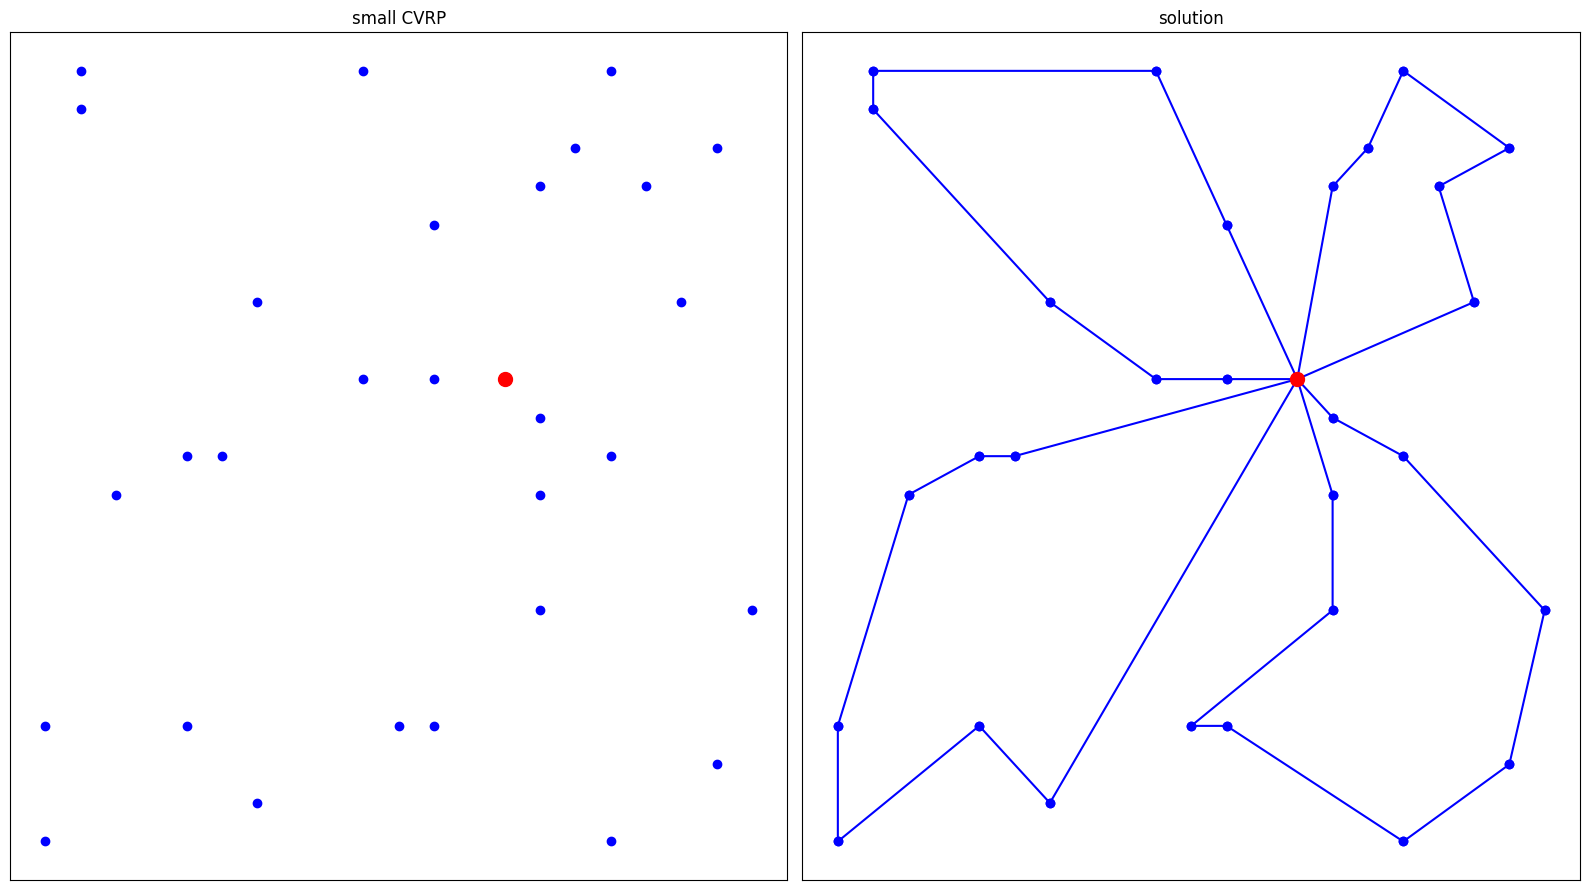

In [14]:
number_of_locations = 30
number_of_vehicles = 5
vehicle_capacity = 100

locations = [(randint(0, 20), randint(0, 20)) for _ in range(number_of_locations)]
distance_matrix = [
    [dist(locations[i], locations[j]) for i in range(number_of_locations)]
    for j in range(number_of_locations)
]

demands = [
    randint(0, 3 * vehicle_capacity * number_of_vehicles // (2 * number_of_locations))
    for _ in range(number_of_locations)
]

sol = solve(distance_matrix, locations, demands, number_of_vehicles, vehicle_capacity, {"TIME_LIMIT": 30, "SEED": SEED})
plot({"small CVRP": [], "solution": [[0] + route + [0] for route in sol]}, locations, 1, 2)

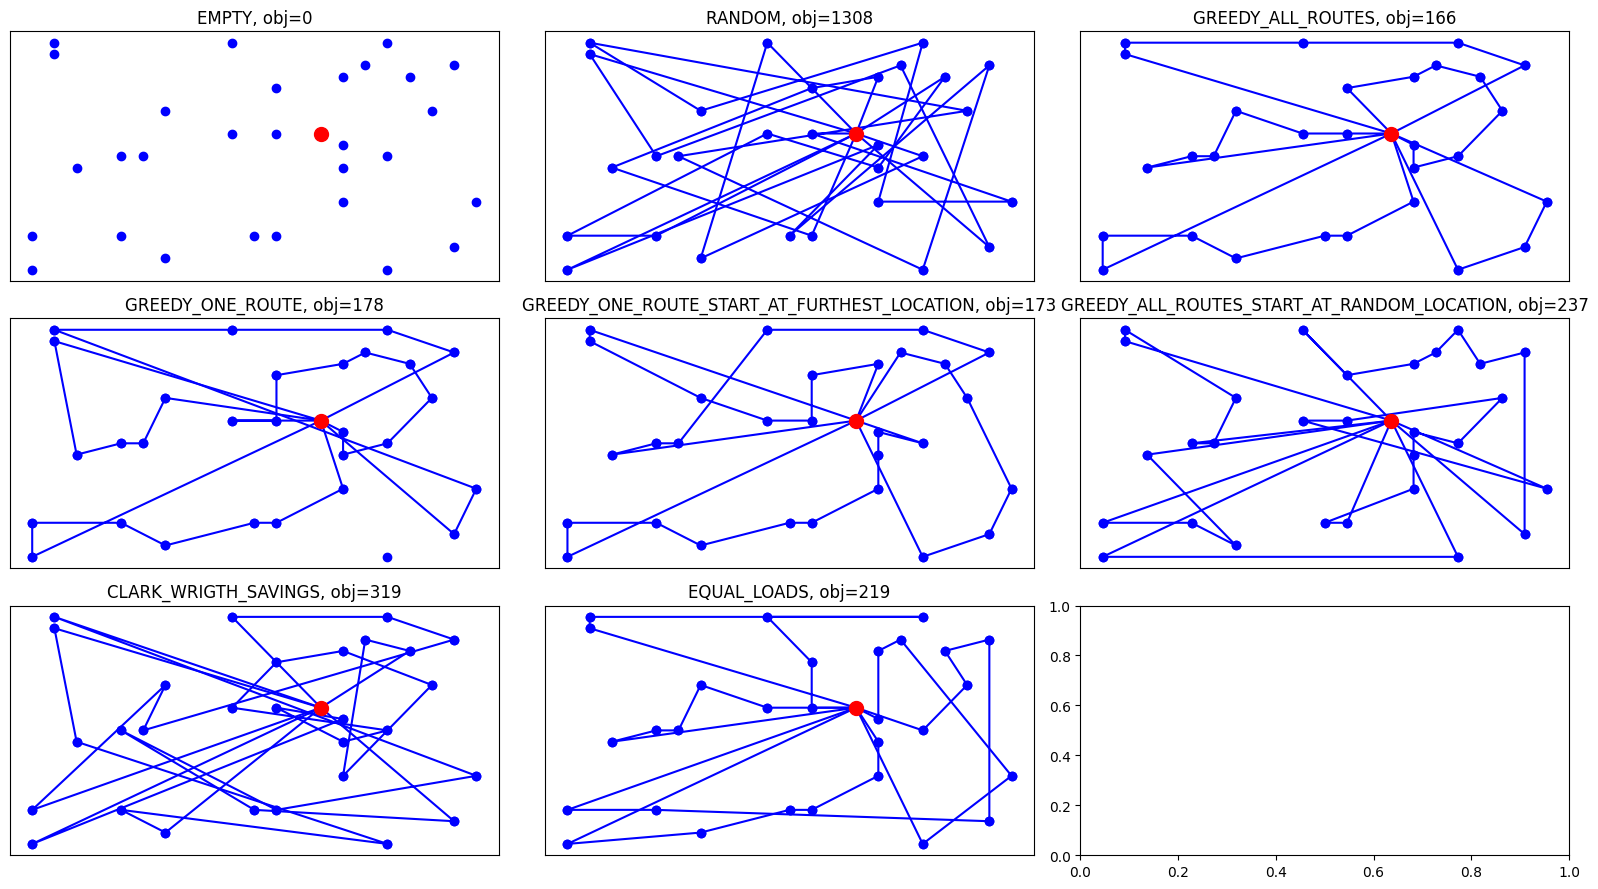

In [15]:
INITIAL_STRATEGIES = [
    "EMPTY", 
    "RANDOM", 
    "GREEDY_ALL_ROUTES", 
    "GREEDY_ONE_ROUTE", 
    "GREEDY_ONE_ROUTE_START_AT_FURTHEST_LOCATION", 
    "GREEDY_ALL_ROUTES_START_AT_RANDOM_LOCATION", 
    "CLARK_WRIGTH_SAVINGS", 
    "EQUAL_LOADS"
]
canvas = {}
for strategy in INITIAL_STRATEGIES:
    sol = generate_initial_solution(distance_matrix, locations, demands, number_of_vehicles, vehicle_capacity, strategy)
    canvas[f"{strategy}, obj={sol.objective():.0f}"] = [[0]+route+[0] for route in sol]
plot(canvas, locations, 3, 3)

(34, 'Numerical result out of range')


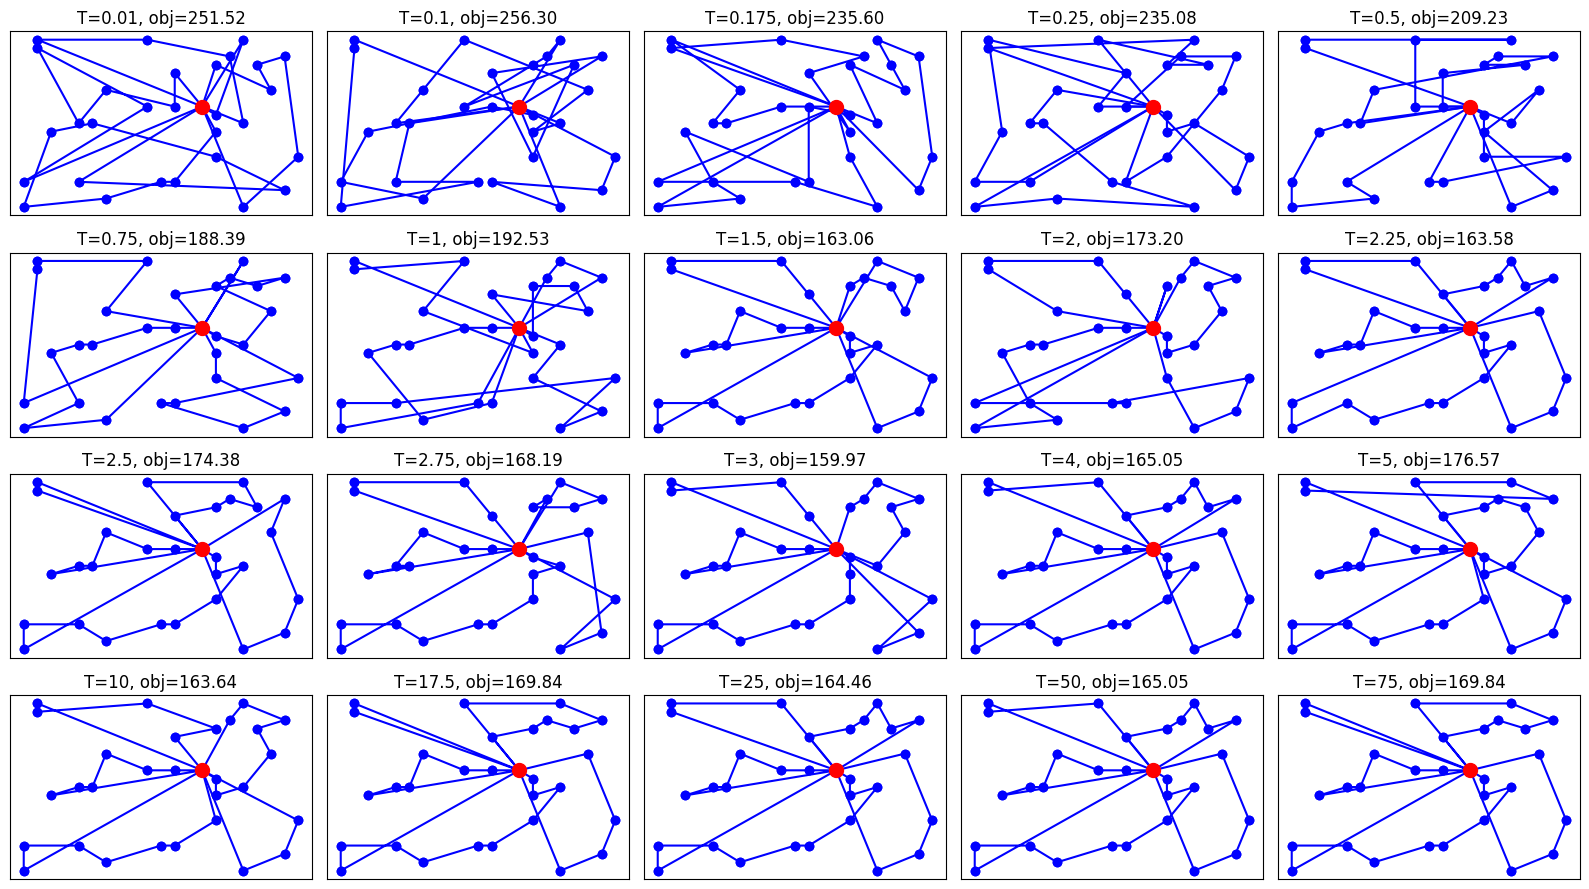

In [16]:
canvas = {}
for T in (0.01, 0.1, 0.175, 0.25, 0.5, 0.75, 1, 1.5, 2, 2.25, 2.5, 2.75, 3, 4, 5, 10, 17.5, 25, 50, 75, 100):
    try:
        sol = generate_initial_solution(distance_matrix, locations, demands, number_of_vehicles, vehicle_capacity, "GREEDY_ALL_ROUTES_RANDOMIZED", T=T)
        reoptimize_routes(sol, time.time()+5, conf=DEFAULT_CONFIG)
        canvas[f"T={T}, obj={sol.objective():.2f}"] = [[0]+route+[0] for route in sol]
    except Exception as e:
        print(e)
plot(canvas, locations, 4, 5)